In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding
import logging
import numpy as np
import pandas as pd
import math
import numpy as np

Using TensorFlow backend.


In [2]:
#將人工標註結果載入
y_train = []
data_path = r"C:\Users\peihsuan\Downloads\19testing_analysis_inwholeA\train_text_whole.txt"
df = pd.read_csv(data_path,encoding='big5')  
y_train = df['label']

In [3]:
#自第862筆起，都是作答未含有A的部分，因此皆為0
print(y_train[862:872])

862    0
863    0
864    0
865    0
866    0
867    0
868    0
869    0
870    0
871    0
Name: label, dtype: int64


In [5]:
#將學生答案及word embedding載入; word embedding為WIKI corpus以字元為單位計算得出
train_text = []
data_path = r"C:\Users\peihsuan\Downloads\19testing_analysis_inwholeA\text_embedding.csv"
df = pd.read_csv(data_path,encoding= 'big5',sep = ';') 
train_text = df['text']

In [6]:
print(train_text[862:872])

862    植物
863    自然
864    自然
865    褐色
866    自然
867    棕色
868    堅硬
869    曲線
870    影子
871    棺材
Name: text, dtype: object


In [7]:
#將文字embedding作為其中一項feature儲存
x_train_seq_tmp = []
x_train_seq_tmp = df['embeddings']

In [8]:
#將embedding轉為數字陣列以利訓練
tmp = []
x_train_seq = []
for items in range(0,len(x_train_seq_tmp)):
    tmp=np.fromstring(x_train_seq_tmp[items], dtype=float, sep=',')
    x_train_seq.append(tmp)
    tmp = []

In [9]:
#訓練集包含1700筆資料
print(len(train_text))

1700


In [10]:
#1700筆訓練資料含有1700筆對應的人工標註結果
print(len(y_train))

1700


In [11]:
#每一項作答都以250維的word embedding表示
print(len(x_train_seq[872]))

250


In [12]:
#觀看embedding內容
print((x_train_seq[872]))

[ 0.0167358   0.32378578 -0.12206512  0.14157685  0.29918178 -0.14039293
 -0.05648178 -0.08206047 -0.20844277  0.03411076  0.16942408 -0.16063007
  0.13802258  0.06235021  0.243707   -0.10127981  0.07997448 -0.02740395
  0.09291904  0.09279155  0.04302995 -0.05080377  0.11251055 -0.04393205
  0.0550322  -0.16994816  0.06367439  0.31051888 -0.0170423  -0.11970894
  0.03552399 -0.24983939  0.13912353 -0.12832299 -0.01908268 -0.16642417
  0.04651336 -0.1476863  -0.25862549 -0.16275316  0.15525897 -0.23722823
 -0.04380455  0.01471271  0.08524326  0.30112175 -0.30158166 -0.14922547
 -0.12505956 -0.20322293 -0.01562159  0.26198085  0.10148319 -0.02446998
  0.08523886  0.01558867  0.11279298  0.19272751  0.18557676  0.09709603
  0.07402777  0.05322942 -0.16063442  0.10042018 -0.07590208 -0.19441626
 -0.01569439 -0.00569171 -0.037163   -0.03143425  0.14189027  0.18877137
 -0.17612664  0.15194623  0.2045658   0.01889552 -0.07590176  0.00844098
 -0.02390475  0.28941439  0.09670511  0.19864716 -0

In [13]:
#將訓練資料切分為訓練及測試; data後30筆為測試
#train_size = int(len(train_text) * 0.8)
train_textembedding, test_textembedding = x_train_seq[:1670], x_train_seq[1670:]
y_train_predict, y_test_predict = y_train[:1670],y_train[1670:]


In [14]:
#建立模型
#* 隱藏層: 共有 100個神經元
#* 輸出層: 只有一個神經元. 1 表示正面; 0 表示負面.

model = Sequential()
model.add(Dense(units=100,activation='relu',input_dim=250))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid' ))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               25100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 25,201
Trainable params: 25,201
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
train_history =model.fit(np.array(train_textembedding), np.array(y_train_predict),batch_size=50, epochs=20,verbose=2,validation_split=0.2)

Train on 1336 samples, validate on 334 samples
Epoch 1/20
 - 0s - loss: 0.5692 - acc: 0.7650 - val_loss: 0.2967 - val_acc: 0.9880
Epoch 2/20
 - 0s - loss: 0.4193 - acc: 0.8249 - val_loss: 0.2443 - val_acc: 0.9850
Epoch 3/20
 - 0s - loss: 0.3349 - acc: 0.8645 - val_loss: 0.1905 - val_acc: 0.9701
Epoch 4/20
 - 0s - loss: 0.2843 - acc: 0.8892 - val_loss: 0.1637 - val_acc: 0.9641
Epoch 5/20
 - 0s - loss: 0.2509 - acc: 0.8967 - val_loss: 0.1296 - val_acc: 0.9671
Epoch 6/20
 - 0s - loss: 0.2256 - acc: 0.9147 - val_loss: 0.1518 - val_acc: 0.9671
Epoch 7/20
 - 0s - loss: 0.2055 - acc: 0.9341 - val_loss: 0.1349 - val_acc: 0.9671
Epoch 8/20
 - 0s - loss: 0.1898 - acc: 0.9334 - val_loss: 0.1429 - val_acc: 0.9671
Epoch 9/20
 - 0s - loss: 0.1780 - acc: 0.9349 - val_loss: 0.1282 - val_acc: 0.9671
Epoch 10/20
 - 0s - loss: 0.1684 - acc: 0.9431 - val_loss: 0.1413 - val_acc: 0.9641
Epoch 11/20
 - 0s - loss: 0.1556 - acc: 0.9454 - val_loss: 0.1628 - val_acc: 0.9461
Epoch 12/20
 - 0s - loss: 0.1509 - acc

In [17]:
%pylab inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


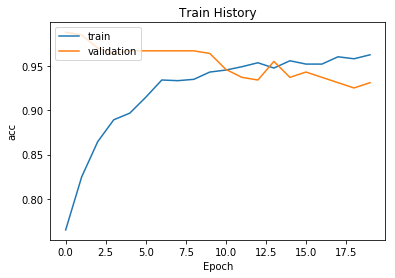

In [18]:
show_train_history(train_history,'acc','val_acc')

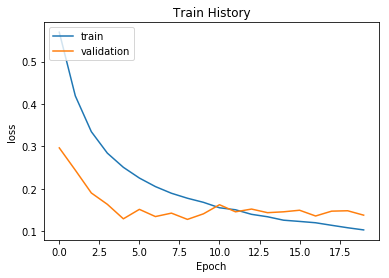

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
#測試準確率
scores = model.evaluate(np.array(test_textembedding), np.array(y_test_predict), verbose=1)
scores[1]

30/30 [==============================] - 0s 33us/step


0.4000000059604645

In [73]:
#預測機率
probility=model.predict(np.array(test_textembedding))

In [21]:
predict=model.predict_classes(np.array(test_textembedding))

In [22]:
predict.shape

(30, 1)

In [23]:
predict_classes=predict.reshape(30)

In [24]:
SentimentDict={1:'屬於A',0:'不屬於A'}
def display_test_Sentiment(i):
    print(train_text[i+1670])
    print('標籤label:',SentimentDict[y_train[i+1670]],'預測結果:',SentimentDict[predict_classes[i]])

In [25]:
for i in range(0,30):
    display_test_Sentiment(i)
    print("\n")

可觸碰
標籤label: 屬於A 預測結果: 不屬於A


接觸
標籤label: 屬於A 預測結果: 不屬於A


可扭曲
標籤label: 屬於A 預測結果: 不屬於A


可腐敗
標籤label: 屬於A 預測結果: 屬於A


配件
標籤label: 屬於A 預測結果: 不屬於A


可穿刺
標籤label: 屬於A 預測結果: 不屬於A


可吸水
標籤label: 屬於A 預測結果: 屬於A


吸水
標籤label: 屬於A 預測結果: 不屬於A


可起火
標籤label: 屬於A 預測結果: 不屬於A


可染色
標籤label: 屬於A 預測結果: 屬於A


扁平
標籤label: 屬於A 預測結果: 不屬於A


飾品
標籤label: 屬於A 預測結果: 屬於A


衣衫
標籤label: 屬於A 預測結果: 屬於A


鬆軟
標籤label: 屬於A 預測結果: 屬於A


靜物
標籤label: 屬於A 預測結果: 不屬於A


扭轉
標籤label: 屬於A 預測結果: 不屬於A


洗滌
標籤label: 屬於A 預測結果: 不屬於A


好捏
標籤label: 屬於A 預測結果: 不屬於A


耐揉捏
標籤label: 屬於A 預測結果: 不屬於A


強韌
標籤label: 屬於A 預測結果: 不屬於A


縞素
標籤label: 屬於A 預測結果: 不屬於A


冒黴菌
標籤label: 屬於A 預測結果: 不屬於A


高透風
標籤label: 屬於A 預測結果: 不屬於A


勻和
標籤label: 屬於A 預測結果: 不屬於A


耐切割
標籤label: 不屬於A 預測結果: 不屬於A


禁入境
標籤label: 不屬於A 預測結果: 不屬於A


雕刻
標籤label: 不屬於A 預測結果: 不屬於A


黏度高
標籤label: 不屬於A 預測結果: 不屬於A


導電
標籤label: 不屬於A 預測結果: 不屬於A


劇毒
標籤label: 不屬於A 預測結果: 不屬於A


